
<div style="text-align: left;">
<table style="width:100%; background-color:transparent;">
  <tr style="background-color:transparent;">
    <td style="background-color:transparent;"><a href="http://www.datascience-paris-saclay.fr">
<img border="0" src="http://project.inria.fr/saclaycds/files/2017/02/logoUPSayPlusCDS_990.png" width="90%"> </td>
<img border="0" src="http://www.auchylesmines.fr/wp-content/uploads/2015/03/Logo-securite-routiere-651x263.jpg" width="60%"> </td>
  </tr>
</table> 
</div>

<center><h1>France accident challenge</h1></center>
<br/>
<center>Nayel Bettache (ENSAE), Axel Marchand (ENSAE), Solène Cochennec (HEC-ENSAE), Rodrigue Rillardon (ENSAE)</center>

Predicting accidents using Open Data Gouv Data: [Open Data Gouv](https://www.data.gouv.fr/fr/)

## Table of Contents

0. [Introduction](#Introduction)
1. [Data](#Data)
3. [Score metric](#Score-metric)
4. [Data exploration](#Data-exploration)
5. [Predictions](#Predictions)
6. [Record linkage](#Record-linkage)
7. [Submission structure](#Submission-structure)
8. [Local testing](#Local-testing-(before-submission))
9. [Submitting to RAMP studio](#Submitting-to-[ramp.studio](http://ramp.studio))
10. [More information](#More-information)

# Introduction

The objective of this challenge is to work with 'massive' and 'raw' data. We have a really high number of datasets, with most of the data either useless or at first not explained or use. Most real data is dirty and the availability of high-quality, open-source ML and data analysis frameworks (such as [scikit-learn](https://scikit-learn.org/),
[pandas](https://pandas.pydata.org/)...) means that the next frontier for tooling and automation lies in preprocessing. This challenge aims to investigate methodologies to perform statistical analysis directly on the original dirty data.

We have at our disposal about 14 years of data about the road accidents in France from 2004 to 2018. We will only use 3 years to avoid using a dataset too huge. 

There are twelve datasets in this challenge, describing the years 2018, 2017, 2016. Each year has 4 differents datasets

* `caracteristiques_{YEAR}.csv` - basic data about the accidents.
* `lieux_{YEAR}.csv` - data about the location of the accidents.
* `usagers_{YEAR}.csv` - data about the people involved in the accidents.
* `vehicules_{YEAR}.csv` - data about the vehicles involved.


# Aim

The predictive aim of this challenge is to use the different datasets to predict the number of accidents for each location in a day. It is advised that you use all datasets, as it improves the prediction (see [Score comparison](#Score-comparison)), but using only the `caracteristiques_{YEAR}.csv` dataset is also allowed.

In [1]:
!python download_data.py

=> File saved as data/vehicules_2018.csv
=> File saved as data/usagers_2018.csv
=> File saved as data/lieux_2018.csv
=> File saved as data/caracteristiques_2018.csv
=> File saved as data/vehicules_2017.csv
=> File saved as data/usagers_2017.csv
=> File saved as data/lieux_2017.csv
=> File saved as data/caracteristiques_2017.csv
=> File saved as data/vehicules_2016.csv
=> File saved as data/usagers_2016.csv
=> File saved as data/lieux_2016.csv
=> File saved as data/caracteristiques_2016.csv


# Data


### Get the data 

In [48]:
import pandas as pd
import os
from data_cleaning import preparation_data 

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
path = "/Users/solene/Desktop/France_accidents/data/" ## Path Solène 

## Concatenation des bases des différents années si concat=True 
df_caracteristiques, df_lieux, df_usagers, df_vehicules = preparation_data(path,concat=True)


/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3249: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):



## Caracteristiques



List of features : 
- Num_Acc : Accident number 
- An : année 
- Mois : Mois
- Jour : Jour 
- hrmn : heure et minutes
- lum : 
- agg 
- int
- atm 
- col 
- com : commune ? 
- adr : adresse 
- gps 
- lat : latitude 
- long : longitude 
- dep 

In [65]:
df_caracteristiques.head(15)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0,5,route des Ansereuilles,M,5055737.0,294992.0,590
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0,11,Place du général de Gaul,M,5052936.0,293151.0,590
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0,477,Rue nationale,M,5051243.0,291714.0,590
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0,52,30 rue Jules Guesde,M,5051974.0,289123.0,590
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0,477,72 rue Victor Hugo,M,5051607.0,290605.0,590
5,201800000006,18,9,23,630,2,2,1,2.0,6.0,52,D39,M,5052132.0,288837.0,590
6,201800000007,18,9,26,40,5,2,1,1.0,6.0,133,4 route de camphin,M,5052211.0,296652.0,590
7,201800000008,18,11,30,1715,5,2,1,1.0,6.0,11,rue saint exupéry,M,5053146.0,293875.0,590
8,201800000009,18,2,18,1557,1,1,1,1.0,6.0,550,rue de l'égalité,M,5053707.0,284896.0,590
9,201800000010,18,3,19,1530,1,2,2,1.0,1.0,51,face au 59 rue de Lille,M,5053639.0,281517.0,590


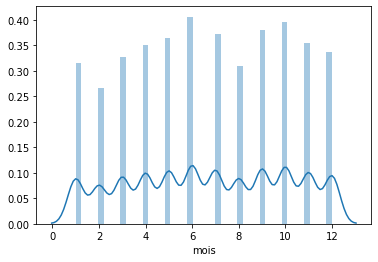

In [63]:
sns.distplot(df_caracteristiques.mois)

In [43]:
df_caracteristiques.shape

(118484, 16)

In [46]:
df_caracteristiques.dtypes

Num_Acc      int64
an           int64
mois         int64
jour         int64
hrmn         int64
lum          int64
agg          int64
int          int64
atm        float64
col        float64
com          int64
adr         object
gps         object
lat        float64
long       float64
dep          int64
dtype: object

In [14]:
df_caracteristiques.isna().sum()

Num_Acc        0
an             0
mois           0
jour           0
hrmn           0
lum            0
agg            0
int            0
atm           31
col           14
com            0
adr         2199
gps         9266
lat        17285
long       17285
dep            0
dtype: int64

In [40]:
df_caracteristiques.nunique()

Num_Acc    118484
an              2
mois           12
jour           31
hrmn         1419
lum             5
agg             2
int            10
atm             9
col             7
com           853
adr         76499
gps             5
lat         83821
long        89925
dep           101
dtype: int64

## Lieux



In [34]:
df_lieux.shape 

(177916, 18)

In [36]:
df_lieux

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59427,201600059428,3,3,2.0,NaN,2.0,0.0,0.0,842.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
59428,201600059429,2,2,2.0,NaN,2.0,0.0,0.0,50.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
59429,201600059430,2,1,2.0,NaN,2.0,0.0,1.0,50.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,99.0
59430,201600059431,2,1,2.0,NaN,2.0,0.0,3.0,438.0,0.0,1.0,4.0,0.0,0.0,1.0,0.0,1.0,99.0


In [69]:
df_lieux.nunique()

Num_Acc    177916
catr            8
voie         1861
v1              2
v2             52
circ            5
nbv            14
pr            569
pr1          1492
vosp            4
prof            5
plan            5
lartpc        263
larrout       418
surf           10
infra           8
situ            6
env1            3
dtype: int64

## Usagers

## Vehicles

## Training and test

# Score metric

# Data exploration

## Caracteristiques

## Lieux

## Usagers

TEST